In [1]:
# -*- coding: utf-8 -*-
"""
Complete this code for combinatorial optimization  problem

Please remove author name if generated by machine automatically
Keep you code anonymous

"""

# Use standard python package only.
import random 
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# MINIMUM GLOBAL VARIABLES TO BE USED
POPULATION_SIZE = 10   # Change POPULATION_SIZE to obtain better fitness.

GENERATIONS = 100  # Change GENERATIONS to obtain better fitness.
CHROMOSOME_SIZE = 10

CROSSOVER_RATE = 0.8 # Change CROSSOVER_RATE  to obtain better fitness.
MUTATION_RATE = 0.2 # Change MUTATION_RATE to obtain better fitness.
ITEMS = np.arange(0, CHROMOSOME_SIZE)
WEIGHT = np.random.randint(1, 15, size = 10)
VALUE = np.random.randint(10, 750, size = 10)
BAGSIZE = 17    #Maximum weight that the bag of thief can hold 

In [3]:
print('The list is as follows:')
print('Item No.   Weight   Value')
for i in range(ITEMS.shape[0]):
    print('{0}          {1}         {2}\n'.format(ITEMS[i], WEIGHT[i], VALUE[i]))

The list is as follows:
Item No.   Weight   Value
0          3         37

1          9         537

2          12         204

3          4         208

4          10         424

5          11         232

6          2         331

7          14         388

8          5         153

9          14         511



In [4]:
def generate_population(population_size, chromosome_size):
    #generate a population of random values ranging from 1s and 0s
    return np.random.randint(2, size = (population_size, chromosome_size))

In [5]:
def cal_fitness(weight, value, population, bag_size, target):
    #Take the fitness 
    fitness_score = np.empty(population.shape[0])
    #for each member of the population
    for i in range(population.shape[0]):
        #calculate the total value of all the items
        total_value = np.sum(population[i] * value)
        #calculate the total weight of all the items
        total_weight = np.sum(population[i] * weight)
        #if weight is less than the bag limit set value to bag
        if total_weight <= bag_size:
            fitness_score[i] = total_value
        #else set value to 0 as that individual is to heavy 
        else :
            fitness_score[i] = 0
    return fitness_score 

In [6]:
def selection(population, fitness_score):
    #get the population size
    fitness_selection = len(fitness_score)

    #select two random individuals to fight in a tounament 
    player1 = random.randint(0, fitness_selection - 1)
    player2 = random.randint(0, fitness_selection - 1)

    #calculate the fitness scores for each player
    player1_fitness = fitness_score[player1]
    player2_fitness = fitness_score[player2]
    
    #Who ever has the grater fitness wins the tounament
    if player1_fitness >= player2_fitness:
        winner = player1
    else:
        winner = player2

    return population[winner, :]

In [7]:
def crossover(first_parent, second_parent, crossover_rate):
    #generate a random value to see if crossover occurs
    random_crossover = np.random.random_sample()
    #if run crossover occurs
    if crossover_rate >= random_crossover:
        #get the indivudials size
        individual = len(first_parent)
        #get a crossover point to preform a crossover 
        crossover_point = random.randint(1, individual - 1)
        #print('crossover point', crossover_point)
        first_child = np.hstack((first_parent[0:crossover_point], second_parent[crossover_point: ]))
        second_child = np.hstack((second_parent[0:crossover_point], first_parent[crossover_point: ]))
    #if crossover doesnt occure then parents move to next gen
    else:
        first_child = first_parent
        second_child = second_parent
    
    #return children
    return first_child, second_child

In [8]:
def mutation(population, mutation_rate):
    #create a mutated population
    mutated_population = np.empty((population.shape))
    for i in range(mutated_population.shape[0]):
        
        random_value = np.random.random_sample()
        mutated_population[i, :] = population[i,:]
        
        if random_value <= mutation_rate:
            int_random_value = random.randint(0, population.shape[1] - 1)
            #if chromosome is 0 change to 1 else change 1 to 0
            if mutated_population[i, int_random_value] == 0:
                mutated_population[i, int_random_value] = 1
            else:
                mutated_population[i, int_random_value] = 0
        else:
            mutated_population
    return mutated_population

In [9]:
def next_generation(next_gen, first_child, second_child):
    #store children in next gen
    next_gen.append(first_child)
    next_gen.append(second_child)

    return next_gen

complete code for a combinitorial optimization problem:
The list is as follows:
Item No.   Weight   Value
0          3         37

1          9         537

2          12         204

3          4         208

4          10         424

5          11         232

6          2         331

7          14         388

8          5         153

9          14         511

Stating pop:  [[0 1 0 1 1 1 0 1 0 0]
 [1 1 1 0 1 0 0 0 1 0]
 [0 0 1 1 1 1 0 1 1 1]
 [0 0 0 0 1 1 0 0 1 1]
 [1 1 0 1 0 1 1 1 1 1]
 [1 1 1 0 0 1 1 1 1 0]
 [0 0 1 1 0 1 0 0 0 1]
 [0 0 0 1 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 0 1]
 [1 1 1 0 1 0 0 0 1 1]]
fitness:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
population:  [[0. 0. 1. 1. 1. 1. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 0. 1. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]]

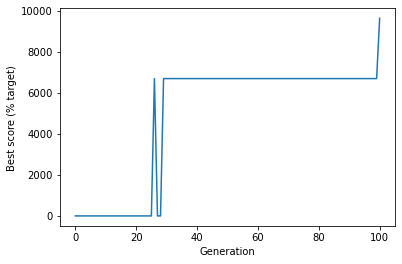

In [12]:
def main():
    print('complete code for a combinitorial optimization problem:')

    global CHROMOSOME_SIZE
    global POPULATION_SIZE 
    global GENERATIONS
    global MUTATION_RATE
    global ITEMS
    global WEIGHT
    global VALUE
    global BAGSIZE
    score_tracker = []
    
    print('The list is as follows:')
    print('Item No.   Weight   Value')
    for i in range(ITEMS.shape[0]):
        print('{0}          {1}         {2}\n'.format(ITEMS[i], WEIGHT[i], VALUE[i]))
    
    
    target = 1
    
    # Set up and score population
    population = generate_population(POPULATION_SIZE, CHROMOSOME_SIZE)
     
    #for individual in population:
    fitness_scores = cal_fitness(WEIGHT, VALUE, population, BAGSIZE, target)
    print('Stating pop: ', population)
    print('fitness: ', fitness_scores)
    
    bestscore = np.max(fitness_scores)/CHROMOSOME_SIZE * 100
    #track the best score 
    score_tracker.append(bestscore)
    
    for generation in range(GENERATIONS):
        new_population = []
        # population range is reduced because creating 2 children
        for i in range(int(POPULATION_SIZE/2)):
            #select 4 members of the population to compete in the taunament selection and produce 2 parents
            first_parent = selection(population, fitness_scores)
            second_parent = selection(population, fitness_scores)

            #crossover the parents to create the children
            first_child, second_child = crossover(first_parent, second_parent, CROSSOVER_RATE)

            #store children in new generation
            new_population = next_generation(new_population, first_child, second_child)
            
        population = np.array(new_population)
        
        #mutate new population
        population = mutation(population, MUTATION_RATE)
        #calculate fitness of new gen
        fitness_scores = cal_fitness(WEIGHT, VALUE, population, BAGSIZE, target)
        
        bestscore = np.max(fitness_scores)/CHROMOSOME_SIZE * 100
        score_tracker.append(bestscore)
        print('population: ', population)
        print('fitness: ', fitness_scores)

    plt.plot(score_tracker)
    plt.xlabel('Generation')
    plt.ylabel('Best score (% target)')
    plt.show()
    
if __name__ == '__main__': 
    main()